Customize the output plots
======================

In this tutorial we will show explicitly how to make the plots made by `wdwarfdate` and we are going to customize them. The goal of this tutorial is to provide code that is easy to modify to make our own versions of the plots.

In [1]:
import wdwarfdate  
import numpy as np
import time
import matplotlib.pyplot as plt

Then we set up the effective temperature and surface gravity that *wdwarfdate* needs to run. The values used in this tutorial are from Cummings, J.D. et al. 2018. We are going to add a list called `comparison` with the results of the parameter estimation from that paper too,

In [2]:
#Define data for the white dwarf

teffs = 14500
teffs_err = 300
loggs = 8.325
loggs_err = 0.042

comparison = [0.705-0.364, #Main sequence age (Gyr)
              0.364, # Cooling age (Gyr)
              0.705, # Total age (Gyr)
              3.40, # Initial mass (Msun)
              0.813, # Final mass (Msun)
              ]

In [3]:
start = time.time()
WD = wdwarfdate.WhiteDwarf(teffs,teffs_err,loggs,loggs_err,
                           model_wd='DA',feh='p0.00',vvcrit='0.0',
                           model_ifmr = 'Cummings_2018_MIST', 
                           high_perc = 84, low_perc = 16,
                           datatype='yr', 
                           save_plots=False, display_plots=False)
WD.calc_wd_age()
end = time.time()
print(f'{np.round(end - start,2)}s')

Running Teff = 14500 +/- 300 K, logg = 8.32 +/- 0.04
Grid limits used to evaluate the posterior: mi = 2.35-4.33 Msun, log10_tcool = 8.46-8.7
12.0s


Now we are going to make separatelly each plot that the code outputs automatically, so we can modify them.

1) "teff_14500_logg_8.325_feh_p0.00_vvcrit_0.0_DA_Cummings_2018_MIST_gridplot.png"

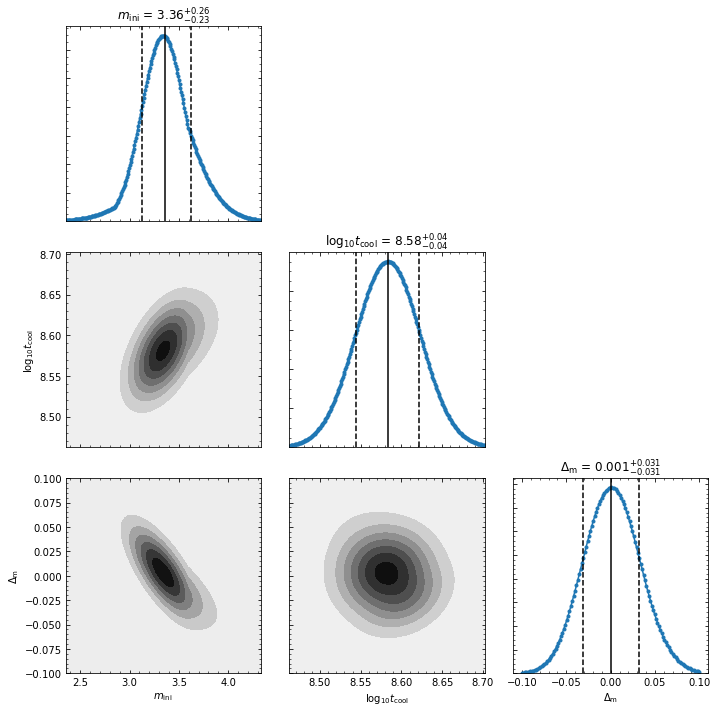

In [4]:
params_label = [r'$m_{\rm ini}$', r'$\log _{10} t_{\rm cool}$',
                        r'$\Delta _{\rm m}$']
res = [WD.mi_median, WD.log10_tcool_median, WD.delta_m_median]
res_err_low = [WD.mi_err_low, WD.log10_tcool_err_low, WD.delta_m_err_low]
res_err_high = [WD.mi_err_high, WD.log10_tcool_err_high, WD.delta_m_err_high]
title = r"${{{0:.2f}}}_{{-{1:.2f}}}^{{+{2:.2f}}}$"
f, axs = plt.subplots(3, 3, figsize=(10, 10), sharex='col')

for i in range(3):
    for j in range(3):
        if i == j:
            # Diagonal plots
            axs[i, j].plot(WD.params[i], WD.params_prob[i], '.-')
            axs[i, j].axvline(x=res[i], color='k')
            axs[i, j].axvline(x=res[i] - res_err_low[i], color='k', linestyle='--')
            axs[i, j].axvline(x=res[i] + res_err_high[i], color='k', linestyle='--')
            axs[i, j].set_yticklabels([])
            axs[i, j].set_ylim(0,)
            if any(np.array([np.round(res[i], 2), np.round(res_err_low[i], 2),
                             np.round(res_err_high[i], 2)]) == 0):
                dec_num = 2
                while any(np.array([np.round(res[i], dec_num),
                                    np.round(res_err_low[i], dec_num),
                                    np.round(res_err_high[i], dec_num)]) == 0):
                    dec_num += 1
                    title2 = r"${{{0:." + str(dec_num) + "f}}}_{{-{1:." + str(dec_num) + "f}}}^{{+{2:." + str(
                        dec_num) + "f}}}$"
                    axs[i, j].set_title(params_label[i] + ' = ' + title2.format(np.round(res[i], dec_num),
                                                                                np.round(res_err_low[i],
                                                                                         dec_num),
                                                                                np.round(res_err_high[i],
                                                                                         dec_num)))
            else:
                axs[i, j].set_title(params_label[i] + ' = ' + title.format(np.round(res[i], 2),
                                                                           np.round(res_err_low[i], 2),
                                                                           np.round(res_err_high[i], 2)))
        elif i > j:
            # Out of diagonal plots
            options = np.array([0, 1, 2])
            mask = np.array([x not in [i, j] for x in options])
            axis_sum = options[mask][0]
            axs[i, j].contourf(WD.params[j], WD.params[i], np.nansum(WD.posterior, axis=(axis_sum)).transpose(),
                               cmap='gist_yarg')
            if j == 1:
                axs[i, j].set_yticklabels([])
        else:
            f.delaxes(axs[i, j])

        if i == 2:
            axs[i, j].set_xlabel(params_label[j])

        if j == 0 and i != 0:
            axs[i, j].set_ylabel(params_label[i])

        axs[i, j].tick_params('both', direction='in', top=True, right=True)
        axs[i, j].minorticks_on()
        axs[i, j].tick_params('both', which='minor', direction='in', top=True, right=True)
plt.tight_layout()
plt.show()

2) "teff_19250_logg_8.16_feh_p0.00_vvcrit_0.0_DA_Cummings_2018_MIST_distributions.png"

We calculate the median, low and high percentiles because, for example, we want to change the units of the output parameters, which we originally set to be yr. The default output of the code will provide the sample of the ages in log(yr). So we can change the units from log(yr) to Gyr.

In [5]:
results = wdwarfdate.calc_percentiles(10**WD.log10_tms_sample/1e9, 
                                      10**WD.log10_tcool_sample/1e9, 
                                      10**WD.log10_ttot_sample/1e9,
                                      WD.mi_sample, WD.mf_sample,
                                      WD.high_perc, WD.low_perc)

And we have everything we need to plot the distributions, adding the results from Cummings et al. 2018 to compare

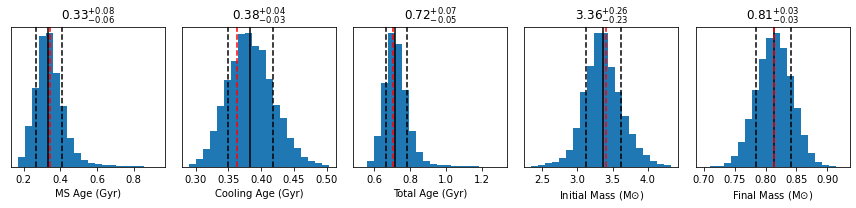

In [6]:
title = r"${{{0:.2f}}}_{{-{1:.2f}}}^{{+{2:.2f}}}$"
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(12, 3))

axs = [ax1, ax2, ax3, ax4, ax5]

labels = ['MS Age (Gyr)', 'Cooling Age (Gyr)', 'Total Age (Gyr)',
          r'Initial Mass (M$\odot$)', r'Final Mass (M$\odot$)']

distributions = [10**WD.log10_tms_sample/1e9, 10**WD.log10_tcool_sample/1e9, 
                 10**WD.log10_ttot_sample/1e9, WD.mi_sample, WD.mf_sample]

for ax, label, dist, i, comparison_i in zip(axs, labels, distributions, np.arange(0, 15, 3), comparison):
    ax.hist(dist[~np.isnan(dist)], bins=20)
    ax.axvline(x=results[i], color='k')
    ax.axvline(x=results[i] - results[i+1], color='k', linestyle='--')
    ax.axvline(x=results[i] + results[i+2], color='k', linestyle='--')
    ax.axvline(x=comparison_i, color='r', linestyle='--')
    ax.set_xlabel(label)
    ax.yaxis.set_visible(False)
    ax.set_title(title.format(np.round(results[i], 2),
                              np.round(results[i+1], 2),
                              np.round(results[i+2], 2)))
plt.tight_layout()
plt.show()

**Fast-test method**

We can do the same for the results from the fast-test method. In this case we need to set `return_distributions=True`, so we can plot the distributions after.

In [7]:
start = time.time()
WD_2 = wdwarfdate.WhiteDwarf(teffs,teffs_err,loggs,loggs_err,
                             method='fast_test',
                             model_wd='DA',feh='p0.00',vvcrit='0.0',
                             model_ifmr = 'Cummings_2018_MIST', 
                             high_perc = 84, low_perc = 16,
                             datatype='yr', return_distributions=True,
                             save_plots=False, display_plots=False)
WD_2.calc_wd_age()
end = time.time()
print(f'{np.round(end - start,2)}s')

0.46s


In a similar way as before, we are going to transform the ages to Gyr. In this case the distributions are in yr. 

In [8]:
res_ms_age2 = np.array(WD_2.distributions[0][0])/1e9 # Main sequence age
res_cool_age2 = np.array(WD_2.distributions[1][0])/1e9 # Cooling age
res_tot_age2 = np.array(WD_2.distributions[2][0])/1e9 # Total age
initial_mass2 = np.array(WD_2.distributions[3][0])     # Initial mass
final_mass2 = np.array(WD_2.distributions[4][0])     # Final mass
results2 = wdwarfdate.calc_percentiles(res_ms_age2, res_cool_age2, res_tot_age2,
                                       initial_mass2, final_mass2,
                                       WD_2.high_perc, WD_2.low_perc)

Once we have the distributions, the plots work in the same way as above. We are going to add the comparisons in this plot too.

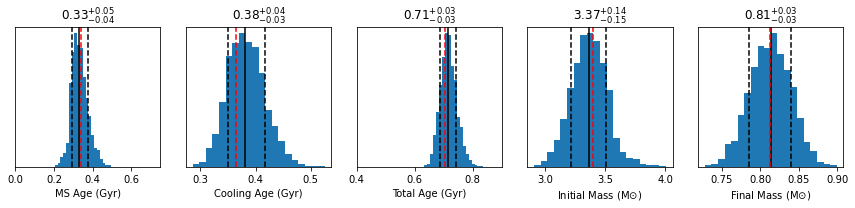

In [9]:
title = r"${{{0:.2f}}}_{{-{1:.2f}}}^{{+{2:.2f}}}$"
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(12, 3))

axs = [ax1, ax2, ax3, ax4, ax5]

labels = ['MS Age (Gyr)', 'Cooling Age (Gyr)', 'Total Age (Gyr)',
          r'Initial Mass (M$\odot$)', r'Final Mass (M$\odot$)']

distributions2 = [res_ms_age2, res_cool_age2, res_tot_age2,initial_mass2, final_mass2]

for ax, label, dist, i, comparison_i in zip(axs, labels, distributions2, np.arange(0, 15, 3), comparison):
    ax.hist(dist[~np.isnan(dist)], bins=20)
    ax.axvline(x=results2[i], color='k')
    ax.axvline(x=results2[i] - results2[i+1], color='k', linestyle='--')
    ax.axvline(x=results2[i] + results2[i+2], color='k', linestyle='--')
    ax.axvline(x=comparison_i, color='r', linestyle='--')
    ax.set_xlabel(label)
    ax.yaxis.set_visible(False)
    ax.set_title(title.format(np.round(results2[i], 2),
                              np.round(results2[i+1], 2),
                              np.round(results2[i+2], 2)))
ax1.set_xlim(0,0.75)
ax3.set_xlim(0.4,0.9)
plt.tight_layout()
plt.show()